In [14]:
import sys
import collections
collections.Iterable = collections.abc.Iterable
import matplotlib.pylab as plt
import numpy as np
import meep as mp

In [145]:
n = 3.4 #index of waveguide
w = 1 # width of waveguide
r = 2.2 # inner radius of ring
pad = 4 # padding between waveguide and edge of PML
dpml = 2 # thickness of PML
sxy = 2*(r+w+pad+dpml) # cell size

In [146]:
sxy

18.4

In [147]:
cyl1 = mp.Cylinder(radius=r+w, material=mp.Medium(index=n)) # outer circle
cyl2 = mp.Cylinder(radius=r) # punch a hole through circle 1 to make ring

In [148]:
guide = mp.Block(mp.Vector3(10,w,0),
                     center=mp.Vector3(0,-4,0),
                     material=mp.Medium(index=n))

In [149]:
fcen = 0.15
df = 0.1
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(r+0.1))

In [150]:
src = mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-4,-4,0))

In [151]:
sim = mp.Simulation(cell_size=mp.Vector3(sxy,sxy), geometry=[cyl1, cyl2, guide], sources=[src], resolution=10, boundary_layers=[mp.PML(dpml)])

In [152]:
#sim.run(mp.at_beginning(mp.output_epsilon), mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(r+0.1), fcen, df)), until_after_sources=300)
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000231981 s
Working in 2D dimensions.
Computational cell is 18.4 x 18.4 x 0 with resolution 10
     cylinder, center = (0,0,0)
          radius 3.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 2.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-4,0)
          size (10,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
time for set_epsilon = 0.124222 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


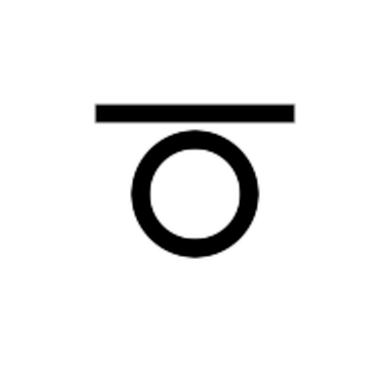

In [153]:
eps_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(sxy,sxy), component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

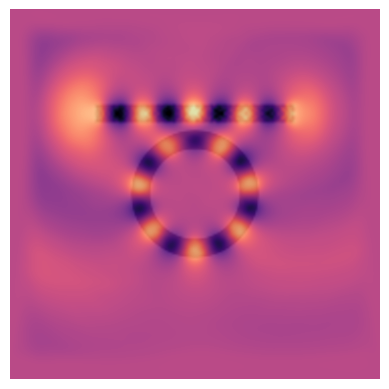

In [154]:
ez_data = sim.get_array(center=mp.Vector3(), size=mp.Vector3(sxy,sxy), component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='magma', alpha=0.90)
plt.axis('off')
plt.show()